In [1]:
#@title Ramki danych 
import pandas as pd
import requests
from io import StringIO
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

pd.options.mode.chained_assignment = None  # default='warn'


orig_url='https://drive.google.com/file/d/1IXjdnNy-jjxh65drrjuNXRqKMJyeNXhe/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
dfs = pd.read_csv(csv_raw)

In [2]:
#@title
dfs= dfs.rename(columns={"sub_region_1":"Voivodeship","retail_and_recreation_percent_change_from_baseline":"Recreation","grocery_and_pharmacy_percent_change_from_baseline":"Grocery_and_Pharmacy","parks_percent_change_from_baseline":"Parks","transit_stations_percent_change_from_baseline":"Transit_stations",	"workplaces_percent_change_from_baseline":"Workplaces",	"residential_percent_change_from_baseline":"Residential"})

In [3]:
#@title 
dfs=dfs[["country_region","Voivodeship","date","Recreation","Grocery_and_Pharmacy","Parks","Transit_stations","Workplaces","Residential"]]

In [4]:
#@title
def dateconv(date):
  q ="2020-03-10"
  if date < q:
    return "Pre-Lockdown"
  else:
    return "During-Lockdown"
  
dfs["Lockdown"] = dfs["date"].apply(dateconv)

In [5]:
#@title
dfs = dfs[(dfs["Recreation"]<=100) & (dfs["Recreation"]>=-100) & 
          (dfs["Grocery_and_Pharmacy"]<=100) & (dfs["Grocery_and_Pharmacy"]>=-100) & 
          (dfs["Parks"]<=100) & (dfs["Parks"]>=-100) & 
          (dfs["Transit_stations"]<=100) & (dfs["Transit_stations"]>=-100) & 
          (dfs["Workplaces"]<=100) & (dfs["Workplaces"]>=-100) & 
          (dfs["Residential"]<=100) & (dfs["Residential"]>=-100)]

In [6]:
#@title
dfs_mz_sl = dfs[(dfs["Voivodeship"] == "Masovian Voivodeship") | (dfs["Voivodeship"] == "Silesian Voivodeship")]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

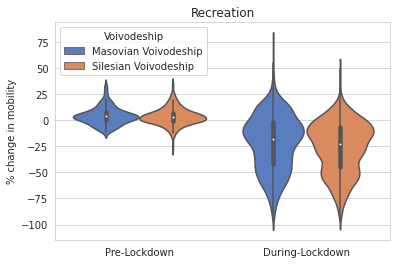

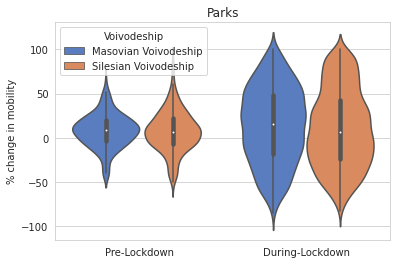

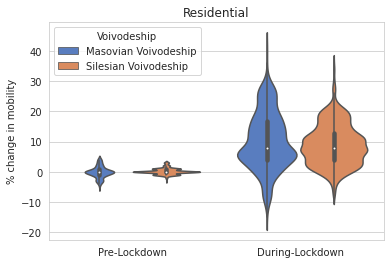

<Figure size 432x288 with 0 Axes>

In [7]:
#@title

sns.set_style("whitegrid")
columns = ["Recreation",	"Parks", "Residential"]
for i in columns:
  ax = sns.violinplot(x="Lockdown", y=i, hue="Voivodeship", data=dfs_mz_sl, palette="muted")
  ax.set_title(i)
  ax.set(xlabel='', ylabel='% change in mobility')
  ax.figure.savefig(f'{i}.png', transparent=True)
  files.download(f'{i}.png') 
  fig = plt.figure()



In [8]:
#@title
import datetime
dfs_mz_sl["date"] =pd.to_datetime(dfs_mz_sl["date"]) 
dfs_mz_sl.set_index("date",inplace=True)

dfs["date"] =pd.to_datetime(dfs["date"]) 
dfs.set_index("date",inplace=True)

In [9]:
#@title 
df_mz = dfs_mz_sl[dfs_mz_sl["Voivodeship"] == "Masovian Voivodeship"].resample('W').agg("mean")
df_sl = dfs_mz_sl[dfs_mz_sl["Voivodeship"] == "Silesian Voivodeship"].resample('W').agg("mean")
df_pl = dfs.resample('W').agg("mean")

In [10]:
#@title
mindate = df_pl.index.min()
maxdate = df_pl.index.max()
lockdown1 = '2020-03-10 00:00:00'
unlock1 = '2020-04-20 00:00:00'
unlock2 = '2020-05-04 00:00:00'
unlock3 = '2020-05-18 00:00:00'
unlock4 = '2020-05-30 00:00:00'
lockdown2 = '2020-08-06 00:00:00'
lockdown3 = '2020-10-17 00:00:00'

In [11]:
#@title
fig = go.Figure()


l = df_pl.columns
colors = ['darkcyan',"red",'darkgreen','sandybrown','darkorchid','navy']
for i in range(len(l)):
  fig.add_trace(go.Scatter(x=df_pl.index, y=df_pl[l[i]],
                    mode='lines+markers',
                    name=l[i].replace("_", " "),
                     marker_color=colors[i],
                     ))
  fig.update_layout(xaxis=dict(range=[mindate,maxdate]),template="plotly_white", paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)')
  fig.update_layout(
    title= "Mobility Trends in Poland",
    width=1400,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=65,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=65,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock4,
            y1=65,
            x1=unlock4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=65,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=65,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)
fig.update_yaxes(title_text="% change in mobility")
fig.add_trace(go.Scatter(
    x=[lockdown1, unlock1, unlock4, lockdown2, lockdown3],
    y=[67, 67, 67, 67, 67],
    text=["Lockdown", "Unlock 1", "Unlock 4", "Regional Lockdowns", "Lockdown"],
    mode="text",
    showlegend=False,
))

# Zmiana wielkości napisów i tytułu 
fig.update_layout(font=dict(size=18, color = "black"), title_font_size = 28)

fig.show(transparent=True)

In [12]:
#@title
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_mz.index, y=df_mz["Workplaces"],
                    mode='lines+markers',
                    name="Masovian Voivodeship",
                    ))
fig.add_trace(go.Scatter(x=df_sl.index, y=df_sl["Workplaces"],
                    mode='lines+markers',
                    name="Silesian Voivodeship",
                    ))
fig.add_trace(go.Scatter(x=df_pl.index, y=df_pl["Workplaces"],
                    mode='lines+markers',
                    name="Poland",
                    ))
fig.update_layout(xaxis=dict(range=[mindate,maxdate]),template="plotly_white", paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(
    title= "Is work back to normal?",
    width=1300,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=22,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=22,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock4,
            y1=22,
            x1=unlock4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=22,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=22,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)
fig.add_trace(go.Scatter(
    x=[lockdown1, unlock1, unlock4, lockdown2, lockdown3],
    y=[24, 24, 24, 24, 24],
    text=["Lockdown", "Unlock 1", "Unlock 4", "Regional Lockdowns", "Lockdown"],
    mode="text",
    showlegend=False,
))
fig.update_yaxes(title_text="% change in mobility in workplaces")

# Zmiana wielkości napisów i tytułu 
fig.update_layout(font=dict(size=18, color = "black"), title_font_size = 28)

fig.show()


In [13]:
#@title

orig_url='https://drive.google.com/file/d/1fdjRzN7Pgv83C2h4iR6Osk3-2XFpOPs5/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
Leroy = pd.read_csv(csv_raw, skiprows=2)
Leroy.columns = ["Data", "Zainteresowanie"]
Leroy['Data'] = pd.to_datetime(Leroy['Data'])

orig_url='https://drive.google.com/file/d/1HWcBDyDTbNzEnlPXZgUtd4bCCq_Ue58c/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
Booking = pd.read_csv(csv_raw, skiprows=2)
Booking.columns = ["Data", "Zainteresowanie"]
Booking['Data'] = pd.to_datetime(Booking['Data'])

orig_url='https://drive.google.com/file/d/1F3Q6lDH2GReRGB1jvxzxPKS6rzWCxKwH/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
Hodowla = pd.read_csv(csv_raw, skiprows=2)
Hodowla.columns = ["Data", "Zainteresowanie"]
Hodowla['Data'] = pd.to_datetime(Hodowla['Data'])

orig_url='https://drive.google.com/file/d/1eIPH18RVlZQ-UKsFUTlQXA5l87Q4VT5K/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
Zachorowania = pd.read_csv(csv_raw)
Zachorowania["Nowe przypadki"] = Zachorowania["Nowe przypadki"].apply(lambda x: x.replace("+", "")).apply(lambda x: int(x))

def toDate(x):
    x = str(x)
    data = ""
    if len(x)== 5:
      data = x[3] + x[4] + "/" + x[0] + x[1] + "/20"
    if len(x)== 4:
      if x[1] == ".":
        data = x[2] + x[3] + "/" + "0" + x[0] + "/20"
      else:
        data = x[3] + "0" + "/" + x[0] + x[1] +  "/20"
    if len(x)== 3:
      data =   x[2] + "0" + "/" + "0" + x[0] + "/20"
    return data

Zachorowania["Data"] = Zachorowania["Data"].apply(lambda x: toDate(x))
Zachorowania['Data'] = pd.to_datetime(Zachorowania['Data']) - pd.to_timedelta(7, unit='d')
df = Zachorowania.groupby([pd.Grouper(key='Data', freq='W-MON')])['Nowe przypadki'].sum().reset_index().sort_values('Data')
#print(Leroy.head(100), Leroy.info())

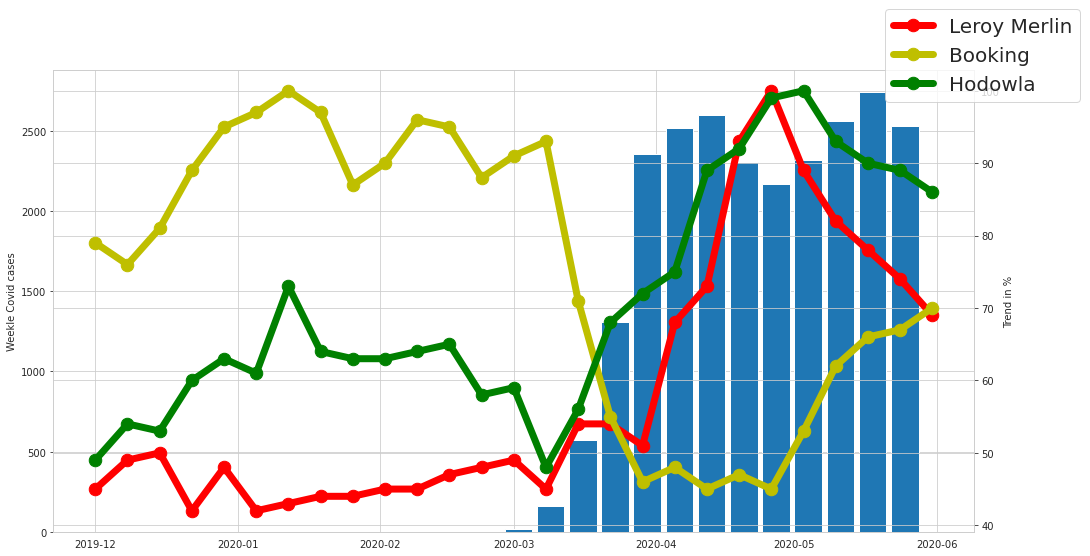

In [14]:
#@title
df2 = df[df["Data"] < "2020-06-1"]
df3 = Leroy[Leroy["Data"] < "2020-06-1"]
df4 = Booking[Booking['Data'] < "2020-06-1"]
df5 = Hodowla[Hodowla['Data'] < "2020-06-1"]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(df2["Data"], df2["Nowe przypadki"], width = 6)
ax1.set_ylabel('Weekle Covid cases')

ax2 = ax1.twinx()
ax2.plot(df3["Data"], df3["Zainteresowanie"], 'r-', label = "Leroy Merlin", linewidth=7, marker = ".", markersize = 25)
ax2.plot(df4["Data"], df4["Zainteresowanie"], 'y-',  label = "Booking", linewidth=7, marker = ".", markersize = 25)
ax2.plot(df5["Data"], df5["Zainteresowanie"], 'g-',  label = "Hodowla", linewidth=7, marker = ".", markersize = 25)
ax2.set_ylabel('Trend in %')
fig.legend(prop={'size': 20})
fig.set_size_inches(16.5, 8.5)
#
plt.show()